# Imports
Numpy import is to handle numpy arrays

Pandas import to handle dataframes

matplotlib import to plot the graphs

tensorflow import as framework to create graph ,choose optimizer and evaluate tensors

Random import to create random samples

Axes3D of matplotlib is to draw 3D graphs

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from mpl_toolkits.mplot3d import  Axes3D

# Reading the dataset from data
### Dataset 
50 Starups dataset
It has 50 instances with 4 numerical columns and catogorical column
* R&D Spend
* Administration
* Marketing Spend
* State
* Profit
[link to dataset](https://www.kaggle.com/divyam811/50-startups)
> Note: For 3D visulization purpose we randomly sample 2 columns of dataset. Based on which ever dataset is required comment and un comment the codes. Based on 3D visualizations requirement comment and uncomment the codes

In [29]:
# 50_Startups dataset
dataset = pd.read_csv(r'..\data\50_Startups.csv')
x_labels = ['R&D Spend', 'Administration', 'Marketing Spend']
y_lables = ['Profit']
x_labels_categorical = ['State']
# Squeezed 3D data for Visualization purpose
x_labels = random.sample(x_labels,2)
y_lables = ['Profit']
x_labels_categorical = []

# Creating Dependent and Independent variables
In Machine learnign we try to predict one values based on remaining given values. In order to do that Indepent variables are created `X`  and depedent variables are created `y`

They have been kept in numpy arrays format
> Note : columns are renames into alphabets, the reason behind this is tensorflow have some specifications to lablel the varibales since 'R&D spend' and 'marketing spend' have spaces in it the columns are reanamed

In [30]:
X = dataset[x_labels]

# Renaming for tensorflow scope
#X.columns = ['a', 'b','c']
#For 3D Visulaization
X.columns = ['a', 'b']
X = X.values
y = dataset[y_lables].values

# Splitting the data into training set and test set
We training our model on train data and test it on Test data so, its accuracy and belief in prediction is mesured using the test data which it has never seen before

Taking 80% data as train data

Taking the remaing 20% as test data

In [31]:
X_train,X_test = np.split(X,indices_or_sections = [int(len(X)*0.8)])
y_train,y_test = np.split(y,indices_or_sections = [int(len(X)*0.8)])

# Variables 
`epochs` : One is epoch is one forward pass + One backward pass through the whole dataset only once
`learning rate`: How effective is the gradients adjusted for the loss acquired. 

In [32]:
epochs = 100
learning_rate = 0.001

# Feature Columns
Nothing but the idependent varible columns. transforming them into a different form for the tensorflow understanble way

In [33]:
# Feature Columns
feature_columns = [tf.feature_column.numeric_column(key="a"),tf.feature_column.numeric_column(key="b"),tf.feature_column.numeric_column(key="c")]
#For 3D Visulaization
feature_columns = [tf.feature_column.numeric_column(key="a"),tf.feature_column.numeric_column(key="b")]

# Creating feature dictionaries
These dictionaries are used in creating in the input function to `model.train ` and `model.predict`
* `features_train ` : used in input function of `model.train`
* `features_test` : used in input function of  ` model.predict`

In [34]:
#features_train = {'a':X_train[:,0],'b':X_train[:,1],'c':X_train[:,2]}
#features_test  = {'a':X_test[:,0], 'b':X_test[:,1], 'c':X_test[:,2]}
#For 3D Visulaization
features_train = {'a':X_train[:,0],'b':X_train[:,1]}
features_test  = {'a':X_test[:,0], 'b':X_test[:,1]}

# Creating an Input function which would return a batch dataset on every call
The input functions are written for the tensorflow estimator function. The estimator would be expecting a batch dataset of which would return a tuple of features and labels.
The type of processing expected is 
```python
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)
```
It would return a batch `tf.data.Dataset` Object
Another acceptable format of input function is 
```python
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels
```
It would return a tuple of two elements, first element features dict and second element labels
Other functions which would support input format are `numpy_input_fn` and `pandas_input_fn`

For more docs and reference
* [Tensorflow Premade Estimator Input Function](https://www.tensorflow.org/guide/premade_estimators "tensorflow premade estimators")
* [Estimator Inputs Module](https://www.tensorflow.org/api_docs/python/tf/estimator/inputs "tf.estimator.inputs")

In [35]:
def input_function(features, labels, batch_size):
    data = tf.data.Dataset.from_tensor_slices((dict(features), labels))     # Convert the inputs to a Dataset.
    return (data.shuffle(10).batch(5).repeat().make_one_shot_iterator().get_next()) #Returning the batch dataset

# Making the lambda function of train dataset
Estimator would be expecting lambda function without any arguments

In [36]:
input_train = lambda: input_function(features_train, y_train,5)

# Build the Estimator
Tensorflow premade estimator are high level api. These estimators provide a very high level implementation of machine learning models.Here in the code we are using the `LinearRegressor` class 

In [37]:
model = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\phani.thontepu\\AppData\\Local\\Temp\\tmpd_gf68db', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000EA7845A0F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Train the model
Training is the process of tuning the models parameters with the provided input data.
`model.train` would take care of calling the `input_train` which would feed the model with input data of shuffled batches. The model would be trained for the given number of epochs.

In [38]:
model.train(input_fn = input_train, steps = epochs)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\phani.thontepu\AppData\Local\Temp\tmpd_gf68db\model.ckpt.
INFO:tensorflow:loss = 117258530000.0, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\phani.thontepu\AppData\Local\Temp\tmpd_gf68db\model.ckpt.
INFO:tensorflow:Loss for final step: 3278738200.0.


# Creating an input function for prediction
Similar to train input function predict input function is also create using pre-built `tf.estimator.input` module

In [39]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(features_test, shuffle=False)

# Prediction the results
Predicting the y-values for the given test values using the `model.predict` function. This fucntion would return a python generator.

In [40]:
predict_results = model.predict(input_fn=predict_input_fn) #This yeilds a python generator

# Extracting the y-predicted values into a numpy array
Converting the values in the generator to numpy array for the ease of plotting.
creating a list -> iterating over the generator and appending values -> converting the list to numpy array

In [41]:
y_predicted = []
for prediction in predict_results:
    y_predicted.append(prediction['predictions'])
y_pred = np.array(y_predicted)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\phani.thontepu\AppData\Local\Temp\tmpd_gf68db\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


# Visualizing the results
We are not showint the indepent varible values
Insted we are plotting the predicted values and actual values to see how good our predictions are

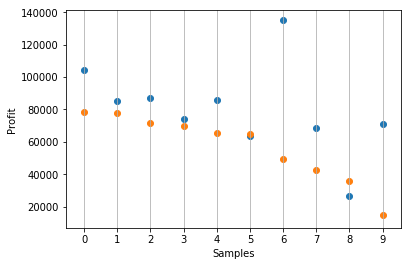

In [42]:
plt.scatter(np.arange(0,len(y_pred),1),y_pred,cmap = 'Sequential')
plt.scatter(np.arange(0,len(y_pred),1),y_test,cmap = 'Sequential')
plt.gca().xaxis.grid(True)
plt.xticks(np.arange(0,len(y_pred),1))
plt.ylabel(y_lables[0])
plt.xlabel('Samples')
plt.show()

# 3D visualization 
By only taking 2 independent variables we are able to create 3D visualization of 
1. predicted and actual values
2. 2D plane separating the thrid dimension predicted values

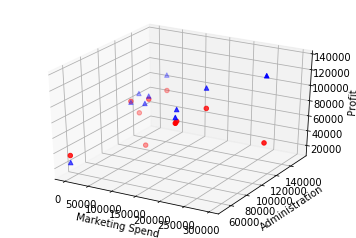

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\phani.thontepu\AppData\Local\Temp\tmpd_gf68db\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


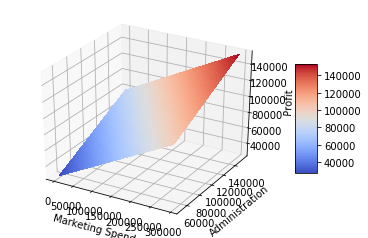

In [43]:
if len(x_labels)==2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = X_test[:,0]
    ys = X_test[:,1]
    ax.scatter(xs, ys, y_test, c='r', marker='o')
    ax.scatter(xs, ys, y_pred, c='b', marker='^')
    ax.set_xlabel(x_labels[0])
    ax.set_ylabel(x_labels[1])
    ax.set_zlabel(y_lables[0])
    plt.show()
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # Make data.
    X = np.arange(min(xs), max(xs),(max(xs)-min(xs))/100)
    Y = np.arange(min(ys), max(ys),(max(ys)-min(ys))/100)
    X, Y = np.meshgrid(X, Y)
    features_predict = {'a':X.ravel(), 'b':Y.ravel()}
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(features_predict, shuffle=False)
    predict_results = model.predict(input_fn=predict_input_fn)
    y_predicted = []
    for prediction in predict_results:
        y_predicted.append(prediction['predictions'])
    y_pred = np.array(y_predicted).reshape(X.shape)
    Z = y_pred
    
    from matplotlib import cm
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    ax.set_xlabel(x_labels[0])
    ax.set_ylabel(x_labels[1])
    ax.set_zlabel(y_lables[0])
    plt.show()